In [117]:
# Import libaries
import re
import importlib


In [118]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway\Libaries')

In [119]:
# Importing self-made libaries
import standards as s
import Monte_Carlo as MC
import life_cycle_assessment as lc
import LCA_plots as lp
import box_plot as bp
import LCIA_calculation as calc

# Reload to reset the state of the self-made libaries
# https://dev.to/fronkan/importlib-reload-for-resting-modules-between-tests-neh
importlib.reload(s)
importlib.reload(MC)
importlib.reload(lc)
importlib.reload(lp)
importlib.reload(bp)

<module 'box_plot' from 'C:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\Libaries\\box_plot.py'>

In [ ]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'
# Specifying the LCIA method
lcia_method = 'recipe'
flow_legend, database_name, file_name, sheet_name, save_dir, initialization, file_name_unique = lc.initilization(path, lcia_method)

The chosen project is Diathermy and the chosen database is model
Folder name Results created
Chosen flows:
sc1 SUD - APOS
sc2 RMD - APOS
sc3 MUD - APOS


In [121]:
df, plot_x_axis_all, impact_categories = lc.quick_LCIA(initialization, file_name, file_name_unique, sheet_name)

Recipe is selected
Initialization is completed
ValueError encountered
Calculating the results for acidification: terrestrial
Calculation 1/483: 'autoclave - APOS' (unit, GLO, None),  Score: 0.006760483726634972 for col 0, row 0
Calculation 2/483: 'bipolar burner manufacturing - APOS' (unit, GLO, None),  Score: 6.083207052314138e-05 for col 0, row 1
Calculation 3/483: 'bipolar burner packaging - APOS' (kilogram, GLO, None),  Score: 0.009062375883798504 for col 0, row 2
Calculation 4/483: 'bipolar burner raw materials - APOS' (unit, GLO, None),  Score: 5.2608234031673694e-05 for col 0, row 3
Calculation 5/483: 'diathermy RM  manufacturing- APOS' (unit, GLO, None),  Score: 0.003706692163472518 for col 0, row 4
Calculation 6/483: 'diathermy RM raw materials - APOS' (unit, GLO, None),  Score: 0.0011509406175244537 for col 0, row 5
Calculation 7/483: 'diathermy SU manufacturing - APOS' (unit, GLO, None),  Score: 0.018668457263089924 for col 0, row 6
Calculation 8/483: 'diathermy SU raw mater

In [122]:
df_rearranged = lc.rearrange_dataframe_index(df)

In [ ]:
# if calculate_cont == True:
#     sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
#     FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, f'df_idx_ofir_{db_type}', lcia_method, db_type)
#     flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)
#     fu_sub_updated = lc.process_update(FU, functional_unit_sub)
    
#     df_cont = lc.LCIA_contribution(impact_category[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)
#     lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impact_category)
#     df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])


In [123]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        if 'ODPinfinite' in  string[0]:
            string[0] = 'ODP'
        elif '1000' in string[0]:
            string[0] = 'GWP'
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all

In [124]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]

unique_elements = lc.unique_elements_list(database_name)
colors = s.plot_colors(unique_elements,'turbo')

inputs = [flow_legend, colors, save_dir, db_type, database_name]

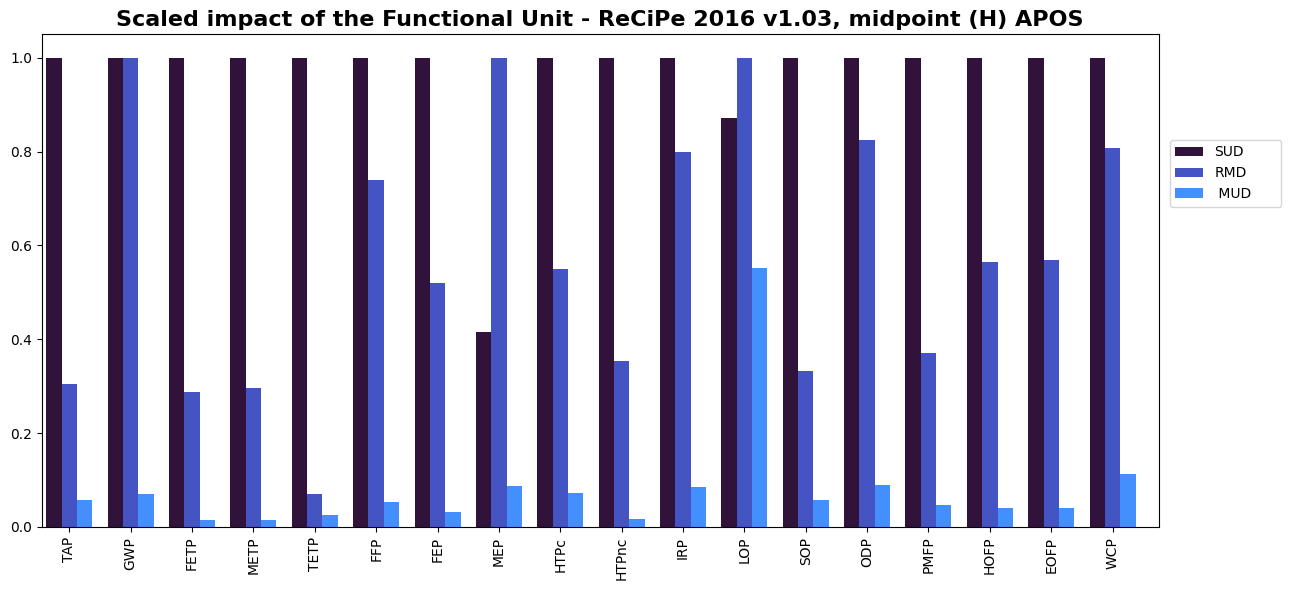

In [125]:
leg_pos_mid = .65

lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories, leg_pos_mid)

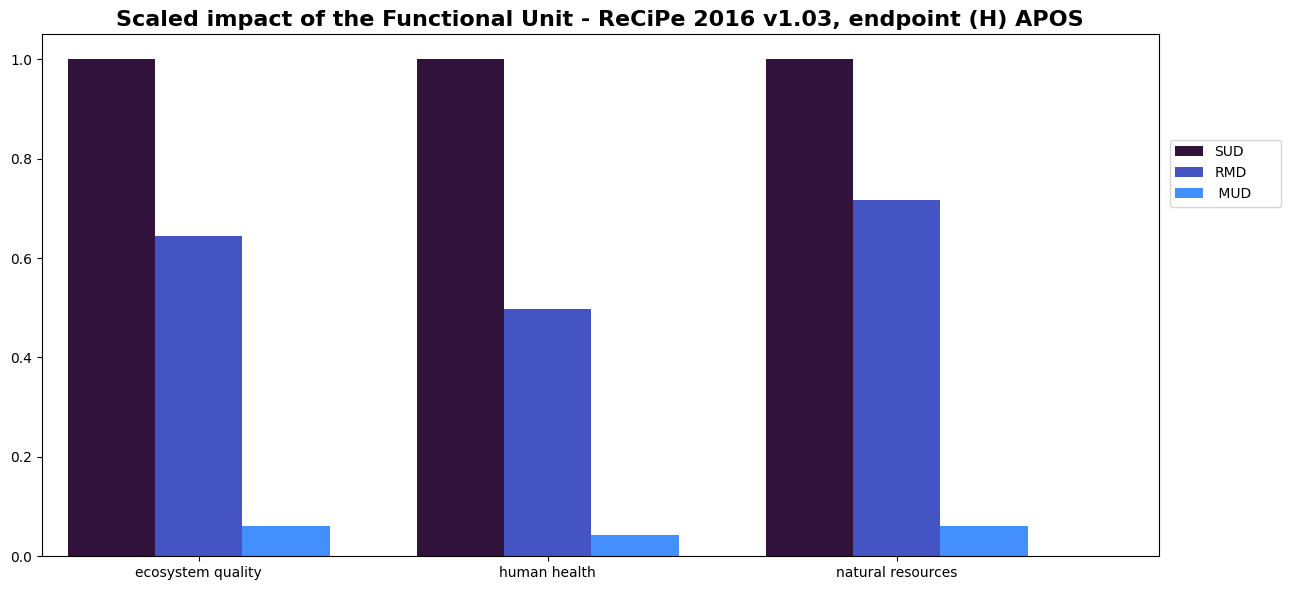

In [126]:
leg_pos_end = 0.67
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_categories[-3:], leg_pos_end)


In [ ]:
unique_elements

['Raw mat.',
 'Manufacturing',
 'Packaging',
 'Autoclave',
 'Container cleaning',
 'Transport',
 'Incineration',
 'Recycling',
 'Avoided mat. prod.',
 'Avoided energy prod.',
 'Total']

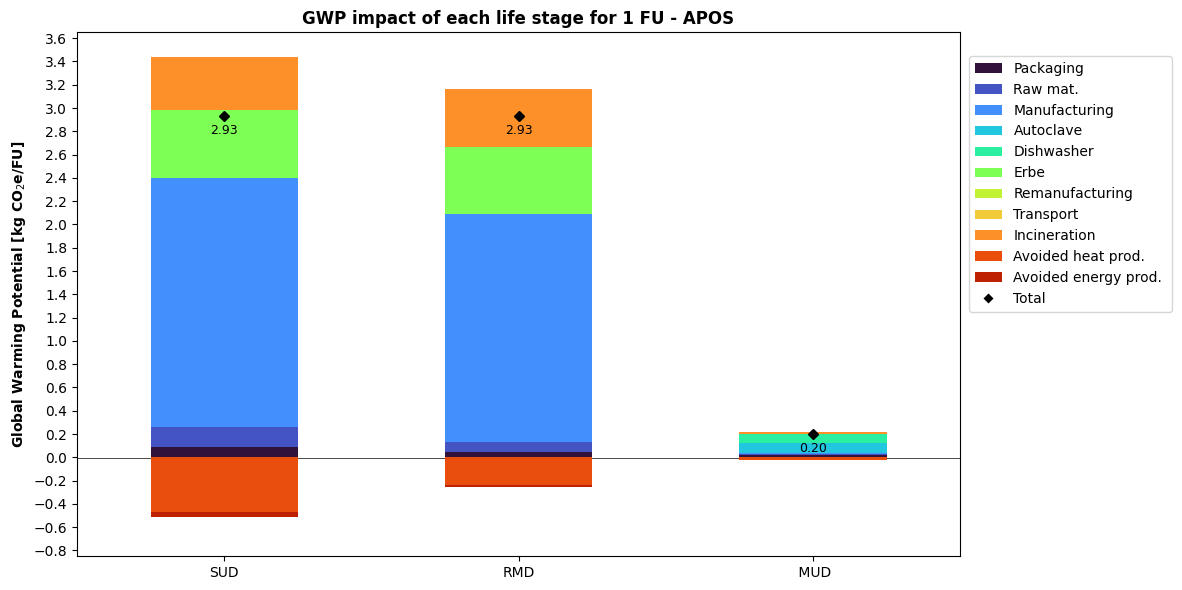

In [130]:
y_min = -0.8
y_max = 3.6
step = 0.2
leg_pos = 0.467
marker_offset = 0.18
y_axis_values = [y_min, y_max, step, leg_pos, marker_offset]
lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


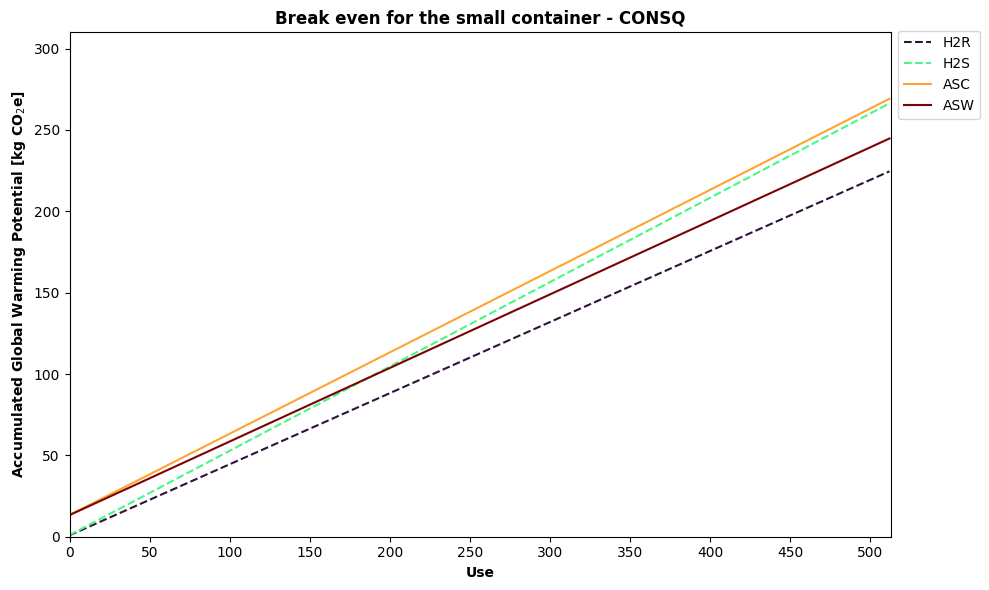

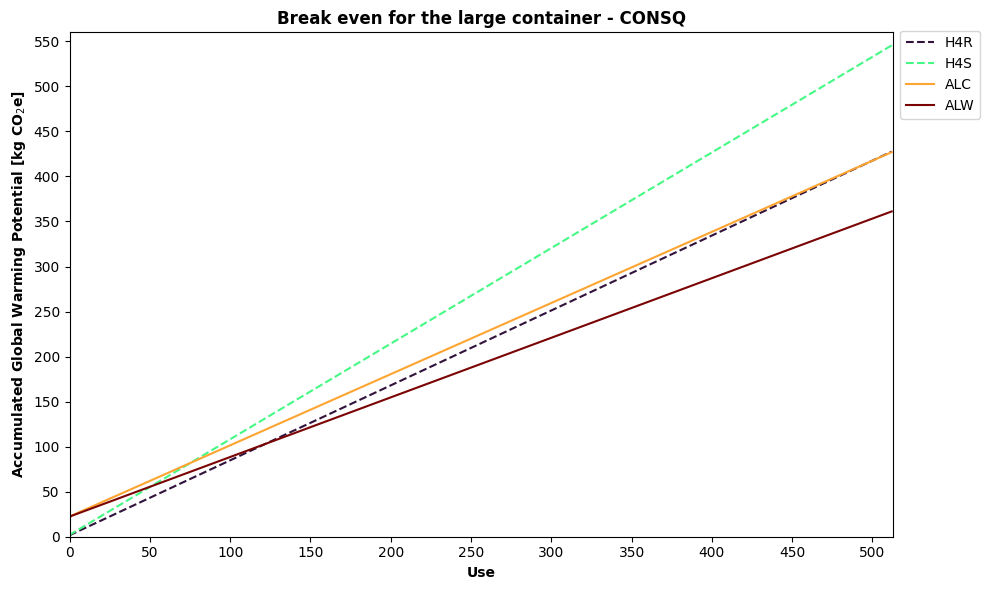

In [ ]:
amount_of_uses = 513
y_max = [300, 550]
ystep = [50, 50]
xstep = 50
break_even_product = 'container'
color_idx = [0, 4, 7, 10]

plot_controls = [amount_of_uses, y_max, ystep, xstep, break_even_product, color_idx]
lp.break_even_graph(df_GWP, inputs, plot_controls)

In [77]:
import pandas as pd
columns = lc.unique_elements_list(database_name)
case = 'break even'
df_be, ignore = lp.process_categorizing(df_GWP, db_type, database_name, case, flow_legend, columns)


df_be_copy = lp.break_even_orginization(df_be, database_name)


# Split index into small and large based on criteria
small_idx = [idx for idx in df_be_copy.index if '2' in idx or 'AS' in idx]
large_idx = [idx for idx in df_be_copy.index if idx not in small_idx]

# Create empty DataFrames for each scenario
scenarios = {
    'small': pd.DataFrame(0, index=small_idx, columns=df_be_copy.columns, dtype=object),
    'large': pd.DataFrame(0, index=large_idx, columns=df_be_copy.columns, dtype=object)
}



# Fill scenarios with data
for sc_idx, (scenario_name, scenario_df) in enumerate(scenarios.items()):
    scenario_df.update(df_be_copy.loc[scenario_df.index])

    alu_box_use, production = {}, {}

    for idx, row in scenario_df.iterrows(): 
        use, prod = 0, 0
        for col in df_be_copy.columns:
            if ('Autoclave' in col or 'Container cleaning' in col) and 'H' not in idx:
                alu_box_use[idx] = row[col] + use
                use += row[col]
            elif 'A' in idx:
                production[idx] = (row[col] + prod) * amount_of_uses
                prod += row[col]
                
            else:
                production[idx] = row[col] + prod
                prod += row[col]


In [78]:
production

{'H4R': 0.8318410602669687,
 'H4S': 1.0613450284246104,
 'ALC': 21.71346163232263,
 'ALW': 21.71346163232263}

In [79]:
alu_box_use

{'ALC': 0.7900058652549578, 'ALW': 0.661677518678098}

In [80]:
proc_keys = [key for key in production.keys()]
proc_keys

['H4R', 'H4S', 'ALC', 'ALW']

In [84]:

ALC_be_R = 0
ALC_be_S = 0
ALW_be_R = 0
ALW_be_S = 0

ALC_be = {}
ALW_be = {}

h4r_old = 0
h4s_old = 0

a, b, c, d  = 0, 0, 0, 0

variable_use = range(1,10000,1)
for use in variable_use:
    h4r = production[proc_keys[0]] * use 
    h4s = production[proc_keys[1]] * use
    alc = (production[proc_keys[2]] * amount_of_uses/use + alu_box_use[proc_keys[2]]*use)
    alw = (production[proc_keys[3]] * amount_of_uses/use + alu_box_use[proc_keys[3]]*use)
    # print(h4r, h4s, alc, alw)
    if alc < h4r:
        if alc > h4r_old and a == 0:
            ALC_be[proc_keys[0]] = use
            a = 1
            print(f'Alu + cabinet break even after {use} uses compared to recycled H400')
    if alc < h4s:
        if alc > h4s_old and b == 0:
            ALC_be[proc_keys[1]] = use
            print(f'Alu + cabinet break even after {use} uses compared to SU H400')
            b = 1
    if alw < h4r and c == 0:
        if alw > h4r_old:
            ALC_be[proc_keys[0]] = use
            print(f'Alu + wipe break even after {use} uses compared to recycled H400')
            c = 1
    if alw < h4s:
        if alw > h4s_old and d == 0:
            ALC_be[proc_keys[1]] = use
            print(f'Alu + wipe break even after {use} uses compared to SU H400')
            d = 1

    h4r_old = h4r
    h4s_old = h4s
            
                      

Alu + wipe break even after 167 uses compared to SU H400
Alu + cabinet break even after 203 uses compared to SU H400
Alu + wipe break even after 256 uses compared to recycled H400
Alu + cabinet break even after 517 uses compared to recycled H400


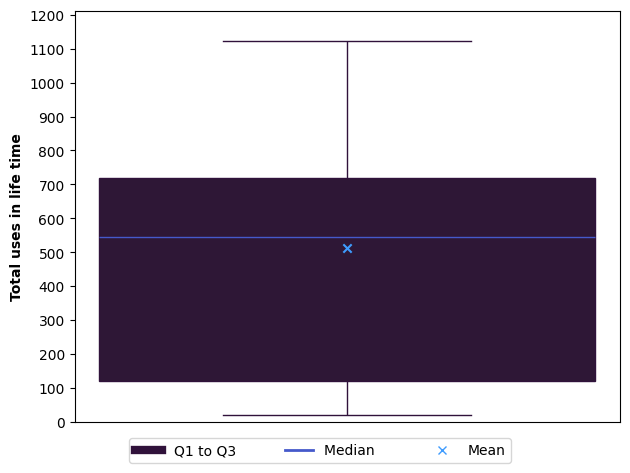

In [ ]:
color_Q1_Q3 = 0
color_median = 1
color_mean = 2
y_label = 'Total uses in life time'
save_name = 'alu_container'
leg_size = 0.7
y_min = 0
y_max = 1210
ystep = 100
life_time = 10

path_box_plot = r"C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Single-use-vs-multi-use-in-health-care\Data\container.xlsx"

plot_structure = [color_Q1_Q3, color_median, color_mean, y_label, save_name, leg_size, y_min, y_max, ystep, life_time]

bp.box_plot(path_box_plot, inputs, plot_structure)